<a href="https://colab.research.google.com/github/Berry-of-Tech/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Sentiment Analysis:Problem Statement

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

In [ ]:
import numpy as np  #linear algebra
import pandas as pd  #data analysis
import matplotlib.pyplot as plt  #data visualization
import string
import nltk  #text preprocessing
import seaborn as sns
import re  #regular expression
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Twitter sentiment analysis/train_tweet_data.csv')
test = pd.read_csv('/content/drive/MyDrive/Twitter sentiment analysis/test_tweet_data.csv')

#Text pre-processing

In [ ]:
#non racist/sexist tweets
train[train['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
#racist/sexist tweets
train[train['label'] == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [ ]:
train.shape, test.shape #train and test dataset dimensions

((31962, 3), (17197, 2))

In [ ]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have only 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%) tweets labeled as non racist/sexist. So, the dataset is inbalanced.

To check the distribution of length of the tweets in both train and test data.

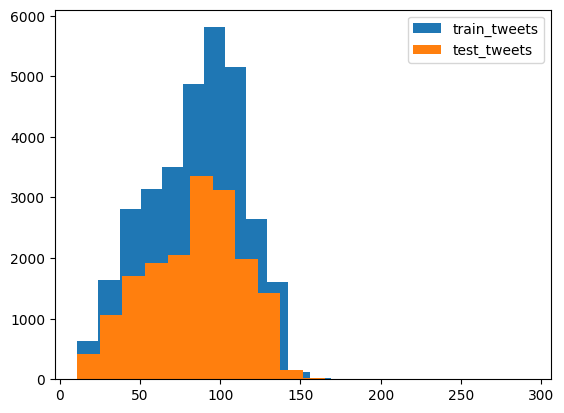

In [ ]:
len_train = train['tweet'].apply(len)
len_test = test['tweet'].apply(len)

plt.hist(len_train, bins=20, label="train_tweets")
plt.hist(len_test, bins=20, label="test_tweets")
plt.legend()


##Data Cleaning

In [ ]:
combined_df = pd.concat([train, test], axis=0, ignore_index=True)
combined_df.shape


(49159, 3)

In [ ]:
# remove twitter handle (@user)

def remove_handles(text):
  pattern = r'@(\w*)'

  # Use re.sub to replace matches with an empty string
  cleaned_text = re.sub(pattern, '', text)

  return cleaned_text

combined_df['cleaned_tweet'] = combined_df['tweet'].apply(remove_handles)
combined_df.head(10)

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [ ]:
# Removing Punctuations, Numbers, and Special Characters

combined_df['cleaned_tweet'] = combined_df['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")
combined_df.head(10)

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [ ]:
# removing short words and stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
combined_df['cleaned_tweet'] = combined_df['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combined_df['cleaned_tweet'] = combined_df['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords.words('english')]))

combined_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


**A. Understanding the common words used in the tweets: WordCloud**


(-0.5, 599.5, 399.5, -0.5)

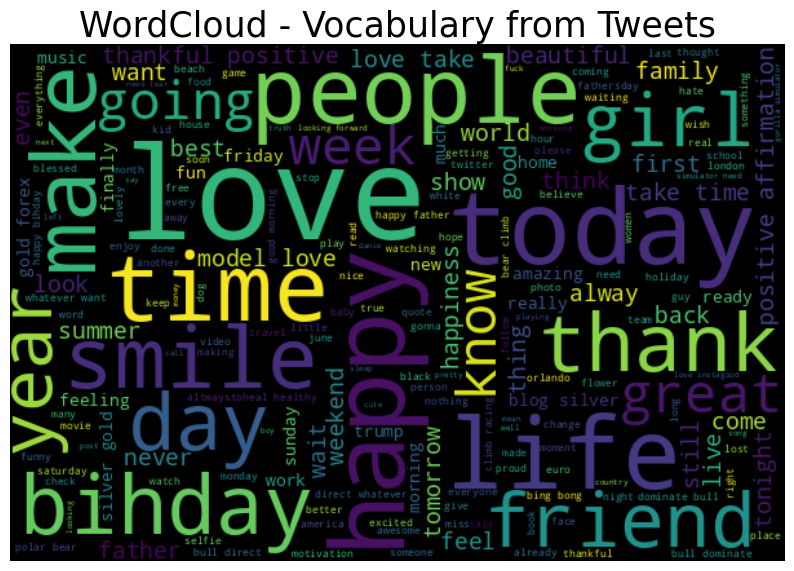

In [ ]:
all_words = ' '.join([text for text in combined_df['cleaned_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=400, random_state=26, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud - Vocabulary from Tweets", fontsize = 25)
plt.axis('off')



**B. Words in non racist/sexist tweets**

(-0.5, 599.5, 399.5, -0.5)

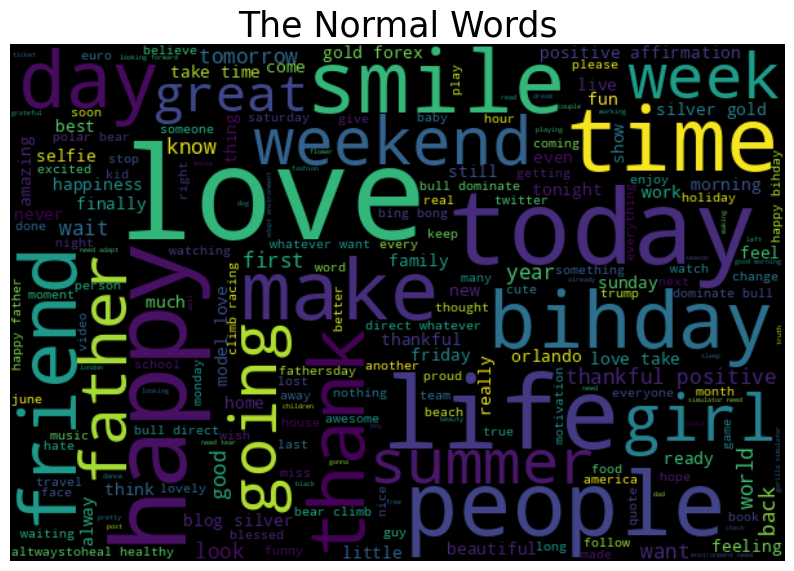

In [ ]:
normal_words =' '.join([text for text in combined_df['cleaned_tweet'][combined_df['label'] == 0]])

wordcloud = WordCloud(width=600, height=400, random_state=26, max_font_size=100).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('The Normal Words',fontsize = 25)
plt.axis('off')

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

**C. Words in Racist/Sexist Tweets**

(-0.5, 599.5, 399.5, -0.5)

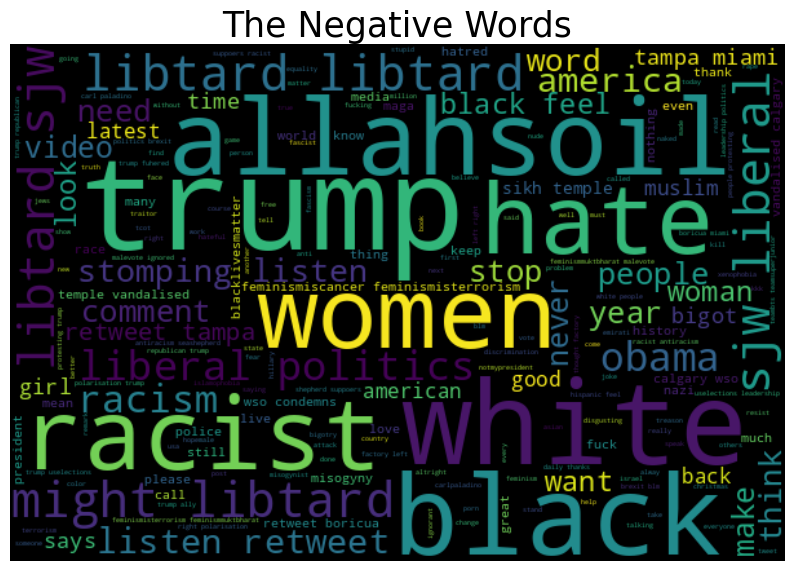

In [ ]:
negative_words = ' '.join([text for text in combined_df['cleaned_tweet'][combined_df['label'] == 1]])
wordcloud = WordCloud(width=600, height=400, random_state=26, max_font_size=100).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('The Negative Words', fontsize = 25)
plt.axis('off')


**D. Understanding the impact of Hashtags on tweets sentiment**

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w*)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combined_df['cleaned_tweet'][combined_df['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combined_df['cleaned_tweet'][combined_df['label'] == 1])

#Flatten the list of lists
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

Non-Racist/Sexist Tweets Hashtags

[Text(0, 0.5, 'Count')]

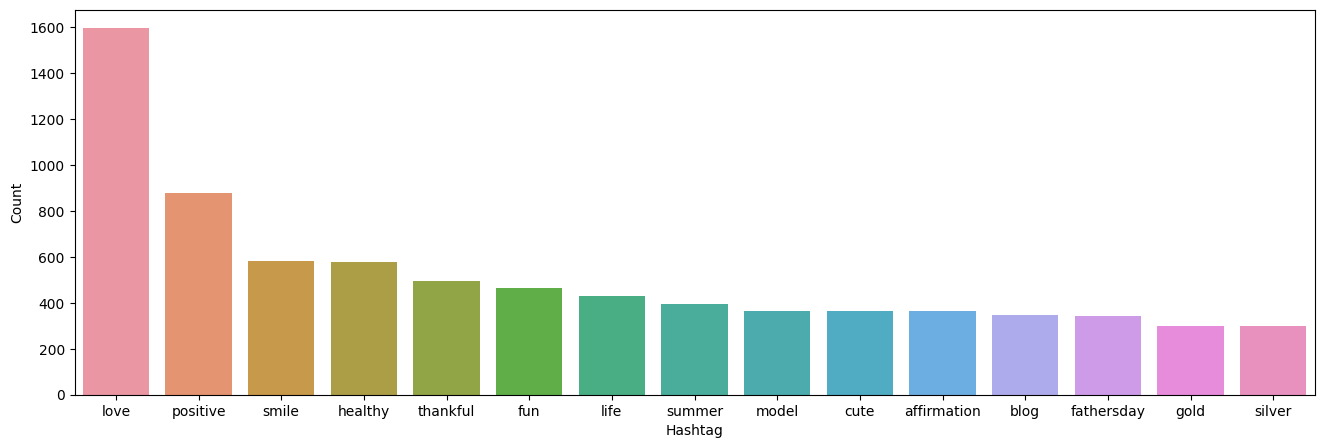

In [ ]:
a = nltk.FreqDist(HT_regular)
b = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 15 most frequent hashtags
b = b.nlargest(columns="Count", n = 15)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=b, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')

Racist/Sexist Tweets Hashtags

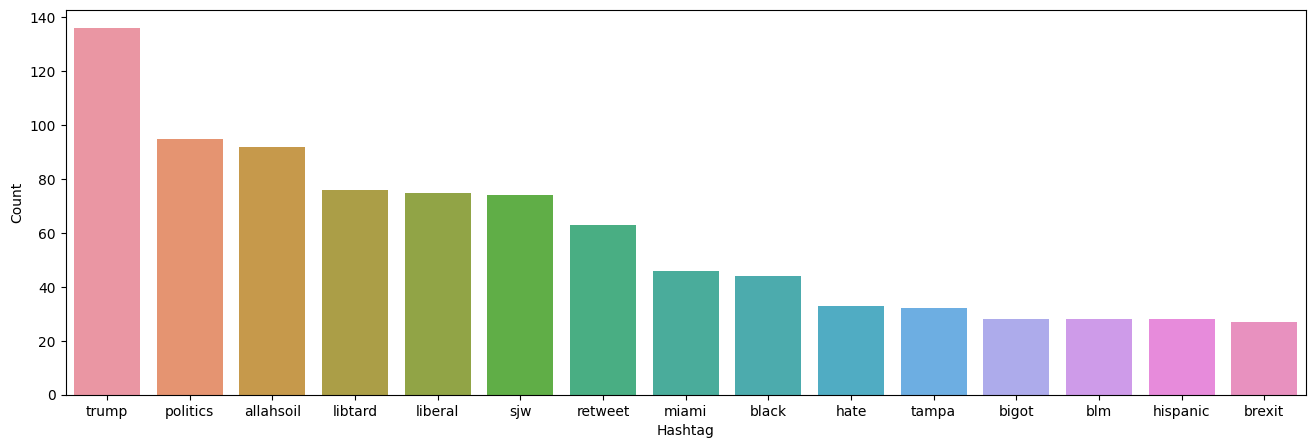

In [ ]:
c = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count': list(c.values())})

# selecting top 15 most frequent hashtags
d = d.nlargest(columns="Count", n = 15)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")

In [ ]:
tokenized_tweet = combined_df['cleaned_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: cleaned_tweet, dtype: object

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combined_df['cleaned_tweet'] = tokenized_tweet

##Extracting Features from Cleaned Tweets

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

###Bag-of-words features

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combined_df['cleaned_tweet'])
bow.shape

(49159, 1000)

###TF-IDF Features

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combined_df['cleaned_tweet'])
tfidf.shape

(49159, 1000)

##Word Embeddings
1. Word2Vec Embeddings

In [ ]:
from gensim.models import Word2Vec
tokenized_tweet = combined_df['cleaned_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 4, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combined_df['cleaned_tweet']), epochs=20)

(5809991, 6601240)

In [ ]:
model_w2v.wv.most_similar(positive="black")

[('abe', 0.4862757921218872),
 ('colt', 0.47172796726226807),
 ('indianapoli', 0.45717331767082214),
 ('theron', 0.4356452524662018),
 ('#philandocastil', 0.4353829622268677),
 ('underwear', 0.43350517749786377),
 ('pellet', 0.4299449026584625),
 ('esta', 0.4209757149219513),
 ('sexest', 0.420393168926239),
 ('waiter', 0.4203805923461914)]

In [ ]:
model_w2v.wv.most_similar(negative = "hate")

[('#ngitingtagumpay', 0.0871696025133133),
 ('#dinner', 0.05233161896467209),
 ('#launch', 0.04285964369773865),
 ('#sushi', 0.03819258511066437),
 ('bihdayjudygarland', 0.03698628768324852),
 ('huin', 0.030139649286866188),
 ('tick', 0.017818057909607887),
 ('#play', 0.015978481620550156),
 ('#pancak', 0.011021103709936142),
 ('#butterfli', 0.010151484049856663)]

In [ ]:
model_w2v.wv['happy']

array([-0.06820393, -0.34721246,  0.1749137 ,  0.01540451, -0.10183896,
       -0.00442543, -0.00686061, -0.0476708 ,  0.08955813,  0.04281386,
       -0.14157844, -0.1746132 , -0.1434589 ,  0.0584242 , -0.15314814,
        0.17917265,  0.3350195 , -0.05426446, -0.16237392, -0.10984909,
       -0.17694898, -0.0915534 , -0.30069834,  0.04328227, -0.2689722 ,
        0.11111725, -0.02911844, -0.07347079,  0.19937682,  0.15399829,
       -0.13685855, -0.3610837 , -0.08997387,  0.14794414, -0.01752524,
       -0.19383451,  0.18898666,  0.09823055,  0.13528638, -0.09462288,
       -0.21544008, -0.08411639, -0.08890883,  0.3142684 , -0.08307787,
       -0.10609829, -0.06596322, -0.13097438, -0.33278087, -0.23331852,
       -0.02360305,  0.0971054 ,  0.0587215 , -0.0828117 , -0.02135613,
        0.03701953, -0.25705928, -0.02309333,  0.40873733,  0.0401498 ,
       -0.02240474,  0.09240854,  0.1508646 ,  0.07506224,  0.1986097 ,
        0.06863066,  0.36306068, -0.02808317, -0.10408695, -0.08

In [ ]:
len(model_w2v.wv['happy']) #The length of the vector is 200

200

###Preparing Vectors for Tweets

average word vector for a list of tokens

In [ ]:
def word_vector(tokens, size):
    vec_size = model_w2v.vector_size
    vec = np.zeros((1, vec_size))
    count = 0.

    for word in tokens:
        if word in model_w2v.wv.key_to_index:
            vec += model_w2v.wv.get_vector(word).reshape((1, vec_size))

    return vec

Preparing word2vec feature set...

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)



###2. Doc2Vec Embedding

In [ ]:
#load the required libraries

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument


To implement doc2vec, we have to **tag** each tokenised tweet with unique IDs. We can do so by using Gensim’s TaggedDocument() function.

In [ ]:
def add_label(tweet):
    output = []
    for i, s in zip(tweet.index, tweet):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [ ]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [ ]:
labeled_tweets[:6]

[TaggedDocument(words=['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'leav', 'chao', 'disput', '#allshowandnogo'], tags=['tweet_5'])]


Now let's train a __doc2vec__ model.

In [ ]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|██████████| 49159/49159 [00:00<00:00, 1856962.13it/s]


In [ ]:
model_d2v.train(labeled_tweets, total_examples= len(combined_df['cleaned_tweet']), epochs=20)

**Preparing doc2vec Feature Set**

In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combined_df)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

##Model Building

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

- Logistic Regression
- RandomForest
- XGBoost

**1- Logistics regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

Bag of words

In [ ]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],
                                                          random_state=42,
                                                          test_size=0.3)

In [ ]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

pred = lreg.predict_proba(xvalid_bow) # predicting on the validation set
pred_int = pred[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 then 1 else 0
pred_int = pred_int.astype(np.int)

result_bow = f1_score(yvalid, pred_int) # calculating f1 score

# confusion matrix
cm = confusion_matrix(yvalid, pred_int)
print(cm)
print("\n")
print(result_bow)

[[8708  197]
 [ 365  319]]


0.5316666666666667


In [ ]:
#Now let's make predictions for the test dataset

test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int


TF-IDF

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [ ]:
lreg.fit(xtrain_tfidf, ytrain)

pred = lreg.predict_proba(xvalid_tfidf)
pred_int = pred[:,1] >= 0.3
pred_int = pred_int.astype(np.int)

# confusion matrix
cm = confusion_matrix(yvalid, pred_int)
print(cm)
print("\n")
f1_score(yvalid, pred_int)


[[8767  138]
 [ 375  309]]




0.5464190981432361

Word2vec Features

In [ ]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [ ]:
lreg.fit(xtrain_w2v, ytrain)

pred = lreg.predict_proba(xvalid_w2v)
pred_int = pred[:,1] >= 0.3
pred_int = pred_int.astype(np.int)

# confusion matrix
cm = confusion_matrix(yvalid, pred_int)
print(cm)
print("\n")
f1_score(yvalid, pred_int)

[[8675  230]
 [ 269  415]]




0.6245297215951843

Doc2vec features

In [ ]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [ ]:
lreg.fit(xtrain_d2v, ytrain)

pred = lreg.predict_proba(xvalid_d2v)
pred_int = pred[:,1] >= 0.3
pred_int = pred_int.astype(np.int)

# confusion matrix
cm = confusion_matrix(yvalid, pred_int)
print(cm)
print("\n")
f1_score(yvalid, pred_int)

[[8654  251]
 [ 491  193]]




0.3421985815602837

**2. RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Bag of words features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

pred = rf.predict(xvalid_bow)
f1_score(yvalid, pred)

0.5506329113924051

In [ ]:
#Test data prediction

test_pred = rf.predict(test_bow)
test['label'] = test_pred


In [ ]:
#TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5611775528978842

In [ ]:
#Word2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.5200845665961946

In [ ]:
#Doc2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.04011461318051576

3. XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Bag-of-Words Features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5238970588235293

In [ ]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred

In [ ]:
#TF-IDF Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5421577515865821

In [ ]:
#Word2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6601769911504425

In [ ]:
#Doc2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain)
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.3743078626799557